# Import Dataset and Library

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from tensorflow import keras, lite
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [2]:
CLASS_NUM = 4
INPUT_SIZE = 96
BATCH_SIZE = 32
INITIAL_EPOCHS = 10
LEARNING_RATE = 1e-3

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2, horizontal_flip=True,validation_split=0.2)
test_datagen =ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('Dataset/Training',
                                                 target_size = (INPUT_SIZE, INPUT_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 subset = 'training')

validation_generator = train_datagen.flow_from_directory('Dataset/Training',
                                            target_size = (INPUT_SIZE, INPUT_SIZE),
                                            batch_size = BATCH_SIZE,
                                            subset = 'validation')

test_generator = test_datagen.flow_from_directory('Dataset/TestingX',
                                            target_size = (INPUT_SIZE, INPUT_SIZE),
                                            batch_size = BATCH_SIZE)

Found 1440 images belonging to 4 classes.
Found 360 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


# Build Pre trained Model

In [3]:
base = tf.keras.applications.MobileNetV2(
    include_top=False,
    alpha=0.35,
    weights="imagenet",
    input_shape=(INPUT_SIZE, INPUT_SIZE, 3),
)


base.trainable = False

model = Sequential([
    layers.InputLayer(input_shape=(INPUT_SIZE, INPUT_SIZE, 3)),
    Model(inputs=base.input, outputs=base.layers[-3].output),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(CLASS_NUM, activation='softmax')
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-06-20 13:23:08.512548: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-20 13:23:08.512701: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<KerasTensor: shape=(None, 3, 3, 1280) dtype=float32 (created by layer 'Conv_1')>

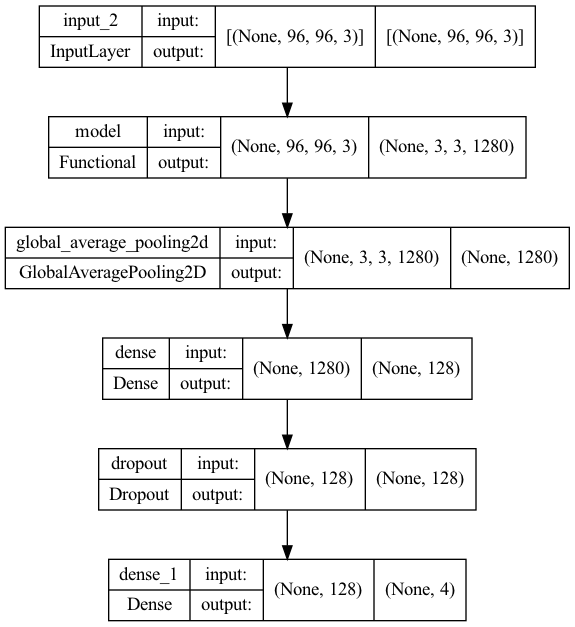

In [4]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Training


In [5]:
epochs = INITIAL_EPOCHS
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs = epochs, validation_data = validation_generator);

Epoch 1/10


2022-06-20 13:23:09.647371: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-20 13:23:10.753891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/45 [============================>.] - ETA: 0s - loss: 0.5206 - accuracy: 0.8125

2022-06-20 13:23:13.183024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 4s 62ms/step - loss: 0.5113 - accuracy: 0.8160 - val_loss: 0.4267 - val_accuracy: 0.8194
Epoch 2/10
45/45 [==============================] - 2s 43ms/step - loss: 0.1355 - accuracy: 0.9583 - val_loss: 0.3124 - val_accuracy: 0.8833
Epoch 3/10
45/45 [==============================] - 2s 42ms/step - loss: 0.0679 - accuracy: 0.9819 - val_loss: 0.3718 - val_accuracy: 0.8722
Epoch 4/10
45/45 [==============================] - 2s 42ms/step - loss: 0.0555 - accuracy: 0.9826 - val_loss: 0.3226 - val_accuracy: 0.8944
Epoch 5/10
45/45 [==============================] - 2s 42ms/step - loss: 0.0436 - accuracy: 0.9889 - val_loss: 0.3337 - val_accuracy: 0.8917
Epoch 6/10
45/45 [==============================] - 2s 42ms/step - loss: 0.0417 - accuracy: 0.9896 - val_loss: 0.3067 - val_accuracy: 0.8833
Epoch 7/10
45/45 [==============================] - 2s 42ms/step - loss: 0.0362 - accuracy: 0.9854 - val_loss: 0.2350 - val_accuracy: 0.9083
Epoch 8/10
45/45 [======

# Training and Validation Graph

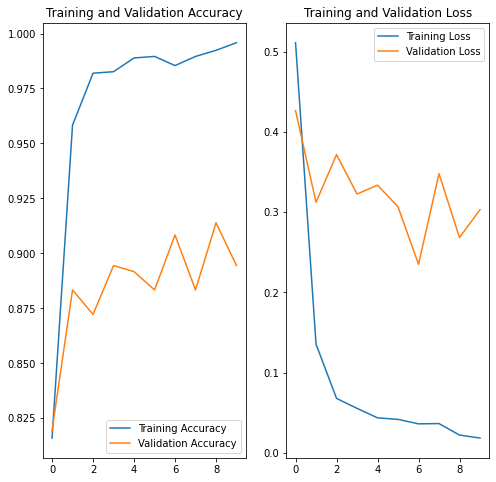

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing

In [7]:
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
# from sklearn.preprocessing import LabelBinarizer

# Y_pred = model.predict(test_generator, test_generator.samples // BATCH_SIZE+1)
# y_pred = np.argmax(Y_pred, axis=1)
# cm = confusion_matrix(test_generator.classes, y_pred)

# print('Confusion Matrix')
# print(cm)
# print('Classification Report')
# target_names = list(test_generator.class_indices.keys())
# print(classification_report(test_generator.classes, y_pred, target_names=target_names))

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
# disp.plot(cmap='Blues')
# plt.show()

In [8]:

# class_names = list(validation_generator.class_indices.keys())

# denny_face = "Grayscale/Testing/Rhevy/21.jpg"
# img = tf.keras.utils.load_img(
#     denny_face, target_size=(INPUT_SIZE, INPUT_SIZE)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )
# print(predictions)

# Convert to TF lite

In [9]:
# def representative_dataset():
#     for _ in range(100):
#         data = np.random.rand(1, INPUT_SIZE, INPUT_SIZE, 3)
#         yield [data.astype(np.float32)]

def representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices((train_generator)).batch(1).take(100):
    yield [tf.dtypes.cast(data, tf.float32)]

# Convert the tflite.
converter = lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
tflite_quant_model = converter.convert()

# Save the model.
with open('trained2.tflite', 'wb') as f:
  f.write(tflite_quant_model)

2022-06-20 13:23:34.781291: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/3g/y_pk3n0d7rl68gs62_42w3p80000gn/T/tmps4n5_dt4/assets


/Users/denuradhan/miniforge3/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-06-20 13:24:25.651290: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-06-20 13:24:25.651311: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-06-20 13:24:25.652498: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/3g/y_pk3n0d7rl68gs62_42w3p80000gn/T/tmps4n5_dt4
2022-06-20 13:24:25.670160: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-06-20 13:24:25.670178: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /var/folders/3g/y_pk3n0d7rl68gs62_42w3p80000gn/T/tmps4n5_dt4
2022-06-20 13:24:25.735149: 

: 

: 